# Analyse data from data sources

In [92]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [93]:
air_reserve = pd.read_csv('../data/air_reserve.csv',
                           decimal=',',
                           infer_datetime_format=True,
                           parse_dates=['visit_datetime','reserve_datetime']
                          ).dropna(how='all',axis=1)

display(air_reserve.head())
display(air_reserve.describe())
print(air_reserve.dtypes)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


,reserve_visitors
count,92378.000000
mean,4.481749
std,4.919669
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,100.000000


air_store_id                object
visit_datetime      datetime64[ns]
reserve_datetime    datetime64[ns]
reserve_visitors             int64
dtype: object


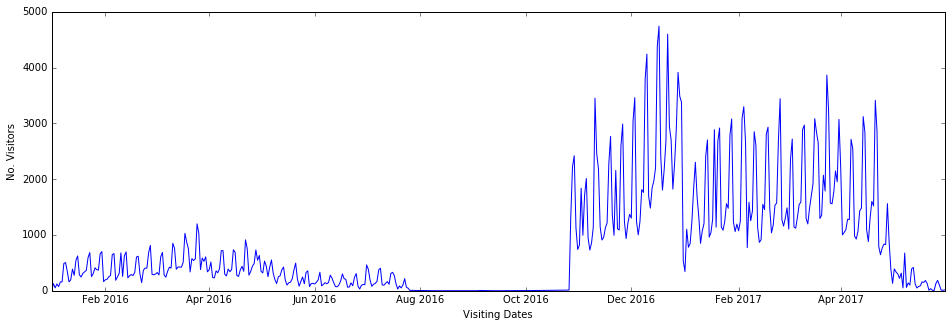

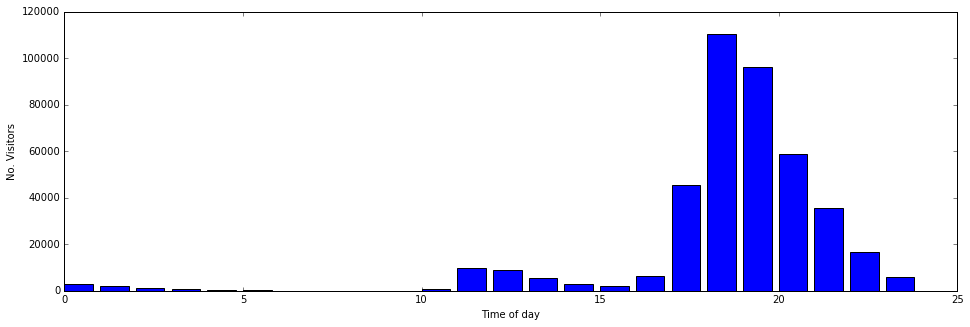

In [166]:
air_reserve1 = air_reserve.copy()

air_reserve1['visit_datetime'] = air_reserve1['visit_datetime'].dt.strftime('%Y/%m/%d')
air_reserve1['reserve_datetime'] = air_reserve1['reserve_datetime'].dt.strftime('%Y/%m/%d')

air_reserve1.reset_index(drop=True, inplace=True)
air_reserve1 = air_reserve1.groupby(['visit_datetime'])['reserve_visitors'].agg(['sum'])
air_reserve1 = air_reserve1.rename(columns={'sum':'reserve_visitors'}).reset_index()
air_reserve1.fillna(0)

air_reserve1['visit_datetime'] = pd.to_datetime(air_reserve1['visit_datetime'])

plt.plot(air_reserve1['visit_datetime'], air_reserve1['reserve_visitors'])
plt.xlabel('Visiting Dates')
plt.ylabel('No. Visitors')
plt.figure(figsize=(16, 5))
plt.show()

air_reserve2 = pd.DataFrame()
air_reserve2['visit_datetime'] = air_reserve['visit_datetime'].dt.strftime('%H:%M')
air_reserve2['reserve_visitors'] = air_reserve['reserve_visitors']
air_reserve2.reset_index(drop=True, inplace=True)
air_reserve2 = air_reserve2.groupby(['visit_datetime'])['reserve_visitors'].agg(['sum'])
air_reserve2 = air_reserve2.rename(columns={'sum':'reserve_visitors'}).reset_index()
air_reserve2.fillna(0) 

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
y = np.array(air_reserve2['reserve_visitors'])

plt.bar(x, y)
plt.xlabel('Time of day')
plt.ylabel('No. Visitors')
plt.show()

air_reserve3 = pd.DataFrame()



In [7]:
hpg_reserve = pd.read_csv('../data/hpg_reserve.csv')
display(hpg_reserve.tail())
display(hpg_reserve.describe())

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
2000315,hpg_2b293477ea4642fb,2017-05-31 20:00:00,2017-04-19 07:00:00,2
2000316,hpg_f922aeca48ca5a29,2017-05-31 20:00:00,2017-03-19 00:00:00,3
2000317,hpg_e9151de687b93aa3,2017-05-31 21:00:00,2017-04-14 20:00:00,49
2000318,hpg_fae6c96189b4a122,2017-05-31 21:00:00,2017-04-19 17:00:00,9
2000319,hpg_0b70de808b55ad1e,2017-05-31 23:00:00,2017-04-21 13:00:00,6


,reserve_visitors
count,2.000320e+06
mean,5.073785e+00
std,5.416172e+00
min,1.000000e+00
25%,2.000000e+00
50%,3.000000e+00
75%,6.000000e+00
max,1.000000e+02


In [9]:
air_store_info = pd.read_csv('../data/air_store_info.csv')

display(air_store_info.tail())

,air_store_id,air_genre_name,air_area_name,latitude,longitude
824,air_9bf595ef095572fb,International cuisine,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
825,air_764f71040a413d4d,Asian,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
826,air_10bbe8acd943d8f6,Asian,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
827,air_7514d90009613cd6,Karaoke/Party,Hokkaidō Sapporo-shi Minami 3 Jōnishi,43.055460,141.340956
828,air_c8fe396d6c46275d,Karaoke/Party,Hokkaidō Sapporo-shi Minami 3 Jōnishi,43.055460,141.340956


In [10]:
hpg_store_info = pd.read_csv('../data/hpg_store_info.csv')

display(hpg_store_info.tail())

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
4685,hpg_c6ed353a48c7c93e,Sichuan food,Tōkyō-to Chiyoda-ku None,35.695780,139.768453
4686,hpg_a58d2423360b2fb4,Sichuan food,Tōkyō-to Minato-ku Roppongi,35.666137,139.733978
4687,hpg_d2021704076cdd70,Shanghai food,Tōkyō-to Chiyoda-ku None,35.695780,139.768453
4688,hpg_602472570d65e219,Spain/Mediterranean cuisine,Tōkyō-to Toshima-ku None,35.730068,139.711742
4689,hpg_11801306ce8bfb4f,Udon/Soba,Osaka Prefecture Osaka None,34.701519,135.498859


In [12]:
store_id_relation = pd.read_csv('../data/store_id_relation.csv')

display(store_id_relation.tail())

,air_store_id,hpg_store_id
145,air_b8925441167c3152,hpg_0cc0abae3a8b52de
146,air_f8233ad00755c35c,hpg_098e4dd30e54fee6
147,air_6607fe3671242ce3,hpg_1004356dc8ab69ec
148,air_ccd19a5bc5573ae5,hpg_df22bf146d2c7e19
149,air_465bddfed3353b23,hpg_23c5945dc1a72454


In [13]:
air_visit_data = pd.read_csv('../data/air_visit_data.csv')

display(air_visit_data.tail())

,air_store_id,visit_date,visitors
252103,air_24e8414b9b07decb,2017-04-18,6
252104,air_24e8414b9b07decb,2017-04-19,6
252105,air_24e8414b9b07decb,2017-04-20,7
252106,air_24e8414b9b07decb,2017-04-21,8
252107,air_24e8414b9b07decb,2017-04-22,5


In [20]:
sample_submission = pd.read_csv('../data/sample_submission 2.csv')

display(sample_submission.head())

# Chosen subset of air restaurants

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


In [17]:
date_info = pd.read_csv('../data/date_info.csv')

display(date_info.head())

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0
